# Introduction

Making use of data on GDP and life expectancy from the World Health Organization and the World Bank, this project aims to try and identify the relationship between the GDP and life expectancy of people in six countries.

During the project, the data will be prepared for analysis using various plots and visualizations. The plots and visualizations will help to answer a variety of questions and communicate the findings of the study in an effective manner.

The scope of the project would be to answer the following questions:
* "Is there a correlation between the GDP and life expectancy of a country? If so, what type of correlation?"
* "How has the GDP changed in each of these countries over time?"
* "How has the life expectancy changed in each of these countries over time?"
* "What is the average life expectancy in each of these 6 nations over the time period?"
* "How are the life expectancies and GDPs distributed over time, for each of these countries?"

Data sources:
* GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

* Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

First, the modules required for the project will be imported. These include modules for loading the data into a dataframe (`pandas`), and for visualization purposes (`matplotlib`, `pyplot` and `seaborn`).

In [1]:
# Import the modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

Data from the **all_data.csv** file will be loaded into a dataframe called `df` in order to carry out visualizations. Using the `.head()` command, a quick inspection of the first 5 rows can be made.

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Running the `.info()` command gives more information regarding the dataframe. It tells us that there are 96 rows, 4 columns, the data types of each column, and the presence of any null entries.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


## Initial Data Exploration

Each of the 4 columns in the dataframe will be analyzed in a more detailed manner. Firstly, the *Country* column depicts the names of the nations whose GDP and Life expectancy data is going to be analyzed. By running the `.unique()` command on the *Country* column of the dataframe, the names of the 6 countries will be printed out:

In [4]:
# Print out the names of the countries
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are 6 countries' data, namely: 
* Chile
* China
* Germany
* Mexico
* United States of America
* Zimbabwe

Next, the *Year* column is analyzed to find out the years for which the data is recorded. Again, the `.unique()` command will be run.

In [5]:
# Print out the names of the years
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Data from 2000 to 2015 is recorded.

## Data Preprocessing

Before the data can actually be used for the creation of various visualizations and plots, it has to be prepared for use. Real-life data is generally not perfect and needs to undergo some cleaning processes before it can be deemed fit for analysis purposes.
Firstly,missing values, if any, should be tackled with. By running the `.count().isnull()` command, as shown below, the number of missing values in each column can be obtained.

In [6]:
print(df.count().isnull())

Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool


As can be seen above, a `False` value was returned for each of the columns, indicating that there are no missing values. Hence, there will be no need to take remedial measures.

Next, it needs to be ensured that the columns are named in a convenient manner. Running the `.columns` command will display the names of the columns in the dataframe.

In [7]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


Besides the `Life expectancy at birth (years)` column, which is too long, all the other columns are conveniently named. Thus, the `Life expectancy at birth (years)` column will have to be abbreviated and renamed. The long name is descriptive, which will be good for labeling the axis, but will create difficulties when coding the plots.

In [8]:
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)

By setting the "inplace = True" condition, the original dataframe will be retained, while only the column involved will be renamed.

On the other hand, the distribution of GDP is very right skewed, with most of the values on the left-hand side. This type of distribution could be described as a power law distribution. 

## Data Visualization

The data is now ready to be plotted and visualized using a variety of different plots.

#### Scatter plot - GDP and Life expectancy

In order to analyze the correlation between GDP and the life expectancy, a scatter plot will be plotted. The x-axis shows the GDP levels of each country from 2000 to 2015, while the y-axis shows the life expectancy at birth, in number of years. Each of the 6 countries' points are plotted in different colors, along with a legend for easy identification.

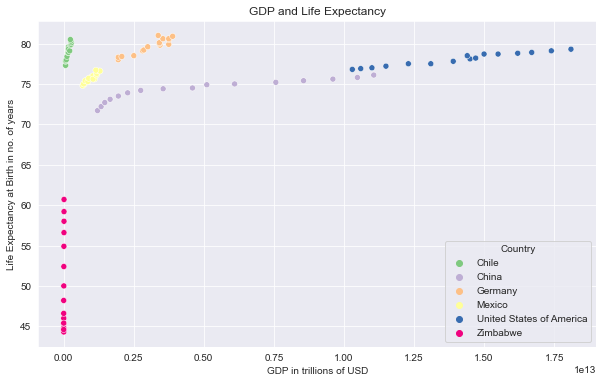

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.scatterplot(data=df, x='GDP', y='LEABY', hue='Country')
plt.xlabel('GDP in trillions of USD')
plt.ylabel('Life Expectancy at Birth in no. of years')
plt.title('GDP and Life Expectancy')
plt.savefig('scatterplot.png')

Generally, there seems to be a positive correlation between GDP growth and the increase in life expectancy. The difference lies in the magnitude of these effects, which vary among the countries. As for China and the USA, the magnitude is not as high as those of the other nations. In the case of the USA, it may be due to the fact that it already starts off at a high GDP level, so the potential for further increase in life expectancy may not be much. China, on the other hand, started off at relatively much lower starting GDP point when compared to the USA, so it will still need quite some time until it can match the standard of the USA. However, it needs to be noted that there is a lot more potential with China and its growth so far has been commendable.

Zimbabwe- one of the poorest nations- displays an almost explosive growth in the life expectancy, albeit very minor, insignificant increases to its GDP. The primary reason is due to it starting off at a very low starting GDP level. Chile also displays similar trends, but remarkably, the life expectancy is extremely high even at such low GDP levels.

Germany and Mexico also display positive correlations, although they have slightly different starting points.

#### Line Plot - Change in GDP of each country over time

In order to be able to answer the question regarding the change in the GDP levels in each country over time, line plots will be created. The x-axis shows the Year and the y-axis shows the GDP levels.

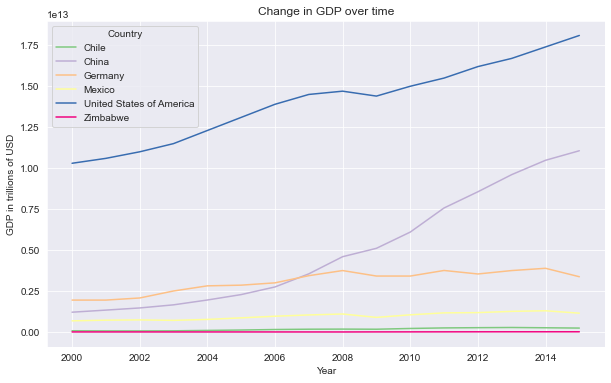

In [11]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.ylabel('GDP in trillions of USD')
plt.title('Change in GDP over time')
plt.savefig('lineplot1.png')

Overall, there is a positive growth observed for GDP over time, although some countries seem to have experienced much more significant increases relative to others. The USA and China have the most noticeable increases, with the rate of growth in China's GDP being higher than that of the USA; this is explained by the steeper positive slope of the line graph depicting China. The USA still remains as the country with the highest overall GDP since it started of at an already high point; despite the fact that China started off much lower- even lower than Germany- its GDP has grown exponentially, resulting in a slight narrowing of the gap with the USA.

Germany and Mexico also display slight noticeable growth in GDP levels, as explained by the shallow lines, with Germany being a little better than Mexico.

On the other hand, Zimbabwe and Chile don't seem to have experienced any significant growth at all; the lines stayed relatively constant over the 15 year period. Only minor, negligible growth was observed.

#### Line Plot - Change in Life Expectancy of each country over time

In order to be able to answer the question regarding the change in the life expectancy in each country over time, line plots will be created. The x-axis shows the Year and the y-axis shows the life expectancy in years.

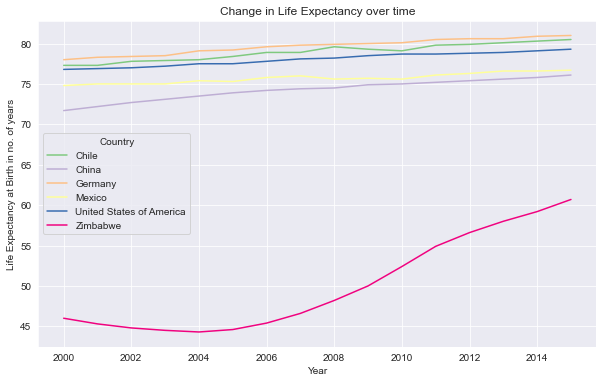

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.lineplot(data=df, x='Year', y='LEABY', hue='Country')
plt.ylabel('Life Expectancy at Birth in no. of years')
plt.title('Change in Life Expectancy over time')
plt.savefig('lineplot2.png')

The most significant rise in life expectancy was observed for Zimbabwe. The life expectancy in 2000 was around 46 years, while in 2015 it was around 62 years of age. Despite being the poorest country in terms of GDP, which increased negligibly, the increase in life expectancy is very much greater in comparison. This probably shows how, at levels of poverty close to the poverty line, even a small increase in people's daily income can have a tremendous impact on lives. Perhaps, the number of people dying young due to malnourishment has reduced. Despite the highest increase, the average lifespan of a citizen of Zimbabwe is only expected to be around 62 years, which is much lower than that of any other country, which start off having more than 71 years life expectancy in the year 2000.

The other 5 countries experienced steady, small increases in life expectancy. Despite having the highest growth rate in GDP, China's life expectancy never surpassed that of Chile, Germany, Mexico or the USA; China placed 5th in terms of longevity. Germany had the longest life expectancy, followed by Chile, the USA, and Mexico, who placed 2nd, 3rd, and 4th respectively.

It is interesting to note how the countries with the most growth and wealth aren't necessarily places where people live the longest, even if the differences are very small.

#### Bar Plot - Average Life Expectancy by Country

The average life expectancy of each country can be compared against each other by plotting the data in the form of bars. The x-axis displays the country and the y-axis displays the average life expectancy for each country over the 15-year time period.

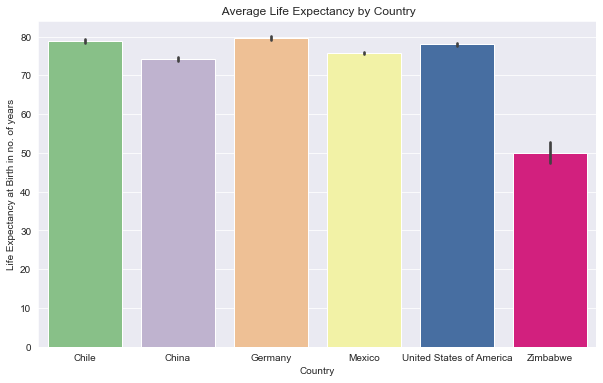

In [13]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.barplot(data=df, x='Country', y='LEABY')
plt.ylabel('Life Expectancy at Birth in no. of years')
plt.title(' Average Life Expectancy by Country')
plt.savefig('barplot.png')

The bar plot helps to solidify the findings made using the line plot examined previously. As it can be observed, Germany had the longest average life expectancy at around 80 years, followed by Chile at around 78 years, the USA at around 77 years, and Mexico at around 75 years, who placed 2nd, 3rd, and 4th respectively. The gaps are very small, so it can be stated that all of these countries' citizens experience similar levels of longevity.

China has the 5th longest average life expectancy at around 72 years, while Zimbabwe places last with around 50 years at the most.

#### Violin Plot - Distribution of Life Expectancy for each country

In order to assess how the life expectancy was distributed for each country, a violin plot will be created for this purpose. The x-axis will show the countries, while the y-axis will show the life expectancies.

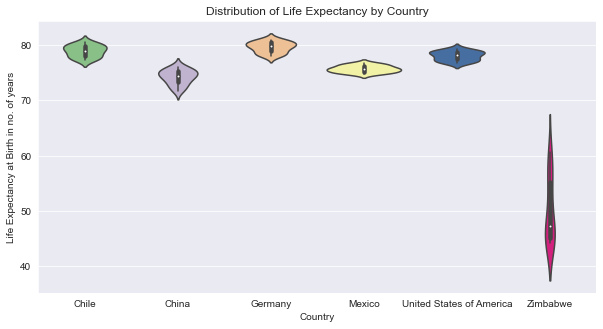

In [14]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.violinplot(data=df, x='Country', y='LEABY')
plt.ylabel('Life Expectancy at Birth in no. of years')
plt.title('Distribution of Life Expectancy by Country')
plt.savefig('violin1.png')

The plot shows how, besides Zimbabwe, all the other countries have fairly similar distributions of life expectancy. All of them are located towards the higher end of the spectrum and have quite narrow ranges, except for China which has a slightly wider range. Most of these distributions are left skewed, again, with China's distribution being the most clear in indicating this. Mexico seems to have a relatively uniform distribution, but Germany, Chile and the USA all show slight left skew. This is explained by the recent improvements in medical healthcare, awareness and fitness, which enable people to lead even healthier lives.

In contrast, Zimbabwe's distribution looks extremely flat and uniform, with the widest range. This is probably due to the sharp rise in longevity seen in the line graph previously. The curve rose sharply with no fluctuation in between. 

#### Violin Plot - Distribution of GDP for each country

In order to assess how the GDP was distributed for each country, a violin plot will be created for this purpose. The x-axis will show the countries, while the y-axis will show the GDP levels.

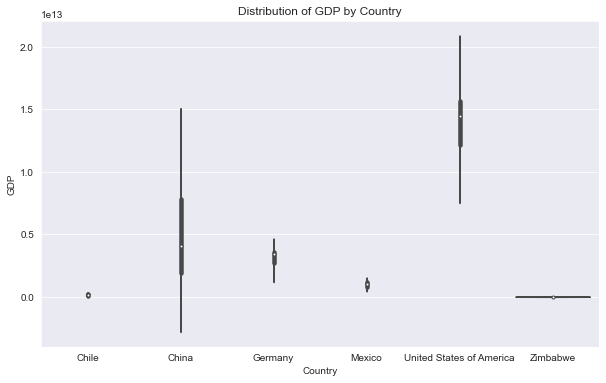

In [15]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.violinplot(data=df, x='Country', y='GDP')
plt.title('Distribution of GDP by Country')
plt.savefig('violin2.png')

The violin plot simply shows a few lines which can say a lot about the distribution of GDP levels in each country. China displays the widest range; as observed previously, it started off a low level, but experienced sharp growth. The USA shows the 2nd widest range, also with a lot of growth, but it started off at a higher level when compared to China.

Germany shows the 3rd widest range, but there seems to be a significant gap between it and the USA, since it has remained with quite low GDP levels over the time period. Mexico and Chile also don't show much growth, while Zimbabwe's GDP hasn't grown noticeably at all while the life expectancy rose, as explained by the horizontal line.

## Findings and Key Takeaways

By using a variety of visualizations, it was possible to gain more depth and greater understanding of the relationships between variables and observe trends and patterns which would have otherwise been quite difficult to know by looking at only the numerical figures. Visualizations, supported with the figures, help to better communicate the results of the analysis.

The goal of the project was to answer the questions posed in the beginning. The brief, summarized reponses to each one was as follows:

* "Is there a correlation between the GDP and life expectancy of a country? If so, what type of correlation?"
    * Yes, generally, a positive correlation existed between GDP levels and life expectancy.
***
* "How has the GDP changed in each of these countries over time?"
    * In most countries, GDP levels have risen- China had the greatest growth, while in others it either rose by negligible amounts or stayed constant.
***
* "How has the life expectancy changed in each of these countries over time?"
    * Life expectancy has increased in all of the countries. Zimbabwe had the greatest increase.
***    
* "What is the average life expectancy in each of these 6 nations over the time period?"
    * Average life expectancy was between mid to high 70s for all countries besides Zimbabwe, which was 50.
***    
* "How are the life expectancies and GDPs distributed over time, for each of these countries?"
    * Life expectancy had a left skewed distribution, while the distribution of GDP was not observable.

In conclusion, the analysis supported the initial findings one would observe during a quick perusal of the data. The evidence allows to solidify the claims.

## Further Areas of Potential Research

With the results obtained, it would be a good idea to delve deeper into why a particular result was observed. For instance, one could aim to research into the reason behind China's sharp growth in GDP levels. Or perhaps why some of the other countries' economies struggled to grow.

One could also aim to research why despite not being extremely wealthy like the USA or China, countries like Chile and Germany have relatively high life expectancy. 